# Setup
### Import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. Check that Python 3.5 or later and Scikit-Learn ≥0.20 are installed.

In [80]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports for clean my dataset
import numpy as np
import os
import pandas as pd
import csv

# Ensuring that nice plots are generated by matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
FIGURES_PATH = os.path.join(PROJECT_ROOT_DIR, "figures")
os.makedirs(FIGURES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(FIGURES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Loading in raw bumble bee count dataset and merging with climate dataset

### Loading in data

In [81]:
#raw US county-wide survey dataset on bumble bees
bee = pd.read_csv("../data/raw/us_county_bee.csv")
#raw US county-wide dataset on climatic variables
climate = pd.read_csv("../data/raw/us_counties_Temp.csv")
#Checking dimensions of bee count data
bee.shape

(10211, 9)

### Merging datasets based on keys [county and state]


In [82]:
#Merging bee to climate
bee_temp = bee.join(climate, lsuffix="_left", rsuffix="_right")
#Saving merged data to the raw folder
bee_temp.to_csv("../data/raw/bee_temp_merged.csv")

### Exploring the contents of the merged dataset and compare with original bee data

In [83]:
#is the number of observations in the original raw bees data equal to that of the merged bee-temperature data?
bee.shape
bee_temp.shape

(10211, 25)

# Data Wrangling and Cleaning: to to obtain a dataset that is ready for modelling

In [84]:
#dropping variables that will not be needed in model estimation and saving the resulting data in processed folder 
bee_temp2 = bee_temp.drop(['hail', 'snow', 'max_wind_speed', 'max_temp', 'min_temp', 'county_right', 'state_right', 'date' ], axis = 1) 


In [85]:
#renaming columns 
bee_temp2 = bee_temp2.rename(columns = {'individualCount':'bee_count','associatedTaxa':'plant',
                                       'state_left': 'state', 'county_left': 'county', 
                                       'ELEV_M': 'elevation'})
bee_temp2.to_csv("../data/processed/bee_temp2.csv")
bee_temp2.head()


,bee_count,plant,year,month,state,county,Latitude,Longitude,scientificName,fips,lat,lon,elevation,mean_temp,wind_speed,wind_gust,precipitation
0,1,NaN,2009,6,Alabama,Bibb,33.04519,-87.00591,Bombus pensylvanicus,53061,48.047489,-121.697306,41.8,44.1,8.3,28.0,0.00
1,1,NaN,2009,6,Alabama,Dallas,32.21282,-86.97015,Bombus pensylvanicus,53061,48.047489,-121.697306,41.8,44.8,13.2,26.0,0.29
2,5,NaN,2008,7,Arkansas,Benton,36.10147,-94.43522,Bombus pensylvanicus,53061,48.047489,-121.697306,41.8,49.9,12.0,26.0,0.54
3,1,NaN,2008,7,Arkansas,Washington,35.82071,-94.15895,Bombus pensylvanicus,17031,41.840039,-87.816716,186.5,36.1,4.8,NaN,0.16
4,10,NaN,2009,8,Illinois,Champaign,39.93715,-88.27055,Bombus pensylvanicus,53061,48.047489,-121.697306,41.8,51.5,13.0,28.0,0.32


(array([9.958e+03, 1.300e+02, 5.300e+01, 2.800e+01, 2.200e+01, 1.100e+01,
        6.000e+00, 0.000e+00, 1.000e+00, 2.000e+00]),
 array([  0. ,  10.6,  21.2,  31.8,  42.4,  53. ,  63.6,  74.2,  84.8,
         95.4, 106. ]),
 <a list of 10 Patch objects>)

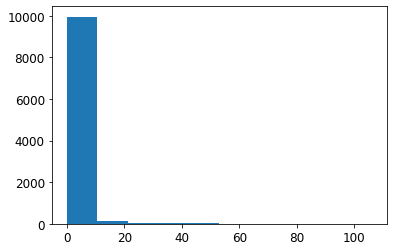

In [86]:
#checking the distriubtion of bumble bee count (target variable)
plt.hist(bee_temp2["bee_count"])

In [35]:
bee_temp2.head()

,bee_count,plant,year,month,state,county,Latitude,Longitude,scientificName,fips,lat,lon,elevation,mean_temp,wind_speed,wind_gust,precipitation
0,1,NaN,2009,6,Alabama,Bibb,33.04519,-87.00591,Bombus pensylvanicus,53061,48.047489,-121.697306,41.8,44.1,8.3,28.0,0.00
1,1,NaN,2009,6,Alabama,Dallas,32.21282,-86.97015,Bombus pensylvanicus,53061,48.047489,-121.697306,41.8,44.8,13.2,26.0,0.29
2,5,NaN,2008,7,Arkansas,Benton,36.10147,-94.43522,Bombus pensylvanicus,53061,48.047489,-121.697306,41.8,49.9,12.0,26.0,0.54
3,1,NaN,2008,7,Arkansas,Washington,35.82071,-94.15895,Bombus pensylvanicus,17031,41.840039,-87.816716,186.5,36.1,4.8,NaN,0.16
4,10,NaN,2009,8,Illinois,Champaign,39.93715,-88.27055,Bombus pensylvanicus,53061,48.047489,-121.697306,41.8,51.5,13.0,28.0,0.32


No handles with labels found to put in legend.


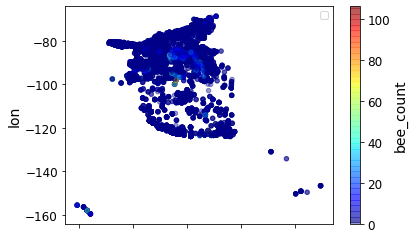

In [87]:
#spatial representation of bee counts
bee_temp2.plot(kind = "scatter", x ="lat", y = 'lon', alpha = 0.4,
              c = 'bee_count', cmap=plt.get_cmap("jet"), colorbar= True,)
plt.legend()

In [13]:
#what is the unique values of plant types (associatedTaxa) for each counts of bumble bees
bee_temp2.groupby('bee_count').plant.value_counts()

bee_count  plant                  
0          Epilobium angustifolium    5
           Cirsium sp.                1
           Liatris sp.                1
           Lupinus sp.                1
           Monardella sp.             1
                                     ..
1          Prunella sp.               1
           Solidago velutina          1
           Stachys sp.                1
           Taraxacum officinale       1
           Verbascum thapsus          1
Name: plant, Length: 89, dtype: int64

In [14]:
#Counts of the unique values of plants
bee_temp2['plant'].value_counts()

Cirsium sp.              469
Lupinus sp.              386
Withheld                 359
Trifolium sp.            297
Epilobium parviflorum    267
                        ... 
Grindelia sp.              1
Solidago velutina          1
Verbascum thapsus          1
Digitalis purpurea         1
Antennaria sp.             1
Name: plant, Length: 84, dtype: int64

In [15]:
#Are there missing values in any of our columns
pd.isnull(bee_temp2).any()

bee_count         False
plant              True
year              False
month             False
state             False
county            False
Latitude          False
Longitude         False
scientificName    False
fips              False
lat               False
lon               False
elevation         False
mean_temp          True
wind_speed         True
wind_gust          True
precipitation      True
dtype: bool


## Correcting for missing values (imputation): this is done for the plant categorical variable by replacing missing values with the mode of plant feature

In [16]:
#imputation
bee_temp2 = bee_temp2.fillna({"plant": "Cirsium sp."})
#saving processed data
bee_temp2 = bee_temp2.to_csv('../data/processed/bee_temp_16_6_20.csv')

## How does each of the features correlate with the target variable (bee_count)

In [88]:
correlation_matrix = bee_temp2.corr()
correlation_matrix['bee_count'].sort_values(ascending=False)

bee_count        1.000000
Longitude        0.322065
mean_temp        0.032530
year             0.004751
month            0.003507
precipitation    0.002273
lon             -0.008857
wind_speed      -0.011115
elevation       -0.016689
wind_gust       -0.029489
lat             -0.035544
Latitude        -0.100989
Name: bee_count, dtype: float64

# Prepare data for Machine Learning

In [29]:
#Reading in cleaned data prepared from the data cleaning stage above
clean_data = pd.read_csv('../data/processed/bee_temp_16_6_20.csv') 
clean_data.columns

Index(['Unnamed: 0', 'bee_count', 'plant', 'year', 'month', 'state', 'county',
       'Latitude', 'Longitude', 'scientificName', 'fips', 'lat', 'lon',
       'elevation', 'mean_temp', 'wind_speed', 'wind_gust', 'precipitation'],
      dtype='object')

In [30]:
#one-hot endoing of the plant variable
clean_data2 = pd.get_dummies(clean, columns = ['plant'])

In [35]:
clean_data2.head()

,Unnamed: 0,bee_count,year,month,state,county,Latitude,Longitude,scientificName,fips,...,plant_Symphoricarpos albus,plant_Taraxacum officinale,plant_Tilia sp.,plant_Trifolium pratense,plant_Trifolium repens,plant_Trifolium sp.,plant_Verbascum thapsus,plant_Vicia sp.,plant_Withheld,plant_Zigadenus sp.
0,0,1,2009,6,Alabama,Bibb,33.04519,-87.00591,Bombus pensylvanicus,53061,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2009,6,Alabama,Dallas,32.21282,-86.97015,Bombus pensylvanicus,53061,...,0,0,0,0,0,0,0,0,0,0
2,2,5,2008,7,Arkansas,Benton,36.10147,-94.43522,Bombus pensylvanicus,53061,...,0,0,0,0,0,0,0,0,0,0
3,3,1,2008,7,Arkansas,Washington,35.82071,-94.15895,Bombus pensylvanicus,17031,...,0,0,0,0,0,0,0,0,0,0
4,4,10,2009,8,Illinois,Champaign,39.93715,-88.27055,Bombus pensylvanicus,53061,...,0,0,0,0,0,0,0,0,0,0


# Running recursive feature engineering (RFE) algorithm to select plant dummy variables that have the most impact on bee count

In [50]:
# importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings("ignore")

In [44]:
#Partiioning dataset into plant features  and target variable to run the RFE
X_plant = clean_data2.drop(["Unnamed: 0", 'bee_count', 'year', 'month', 'state', 'county', 'Latitude', 'Longitude', 
                            'scientificName', 'fips', 'lat', 'lon', 'elevation', 'mean_temp', 'wind_speed', 
                             'wind_gust','precipitation'], axis =1)
y_rfe = clean_data2['bee_count']

In [51]:
#A for loop to select the optimal number of plant features that have the most impact on bee count
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X_plant,y_rfe, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 12
Score with 12 features: 0.002758


In [52]:
#We obtain the names of the selected 12 plants features
cols = list(X_plant.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 12)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X_plant,y_rfe)  
#Fitting the data to model
model.fit(X_rfe,y_rfe)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['plant_Achillea sp.', 'plant_Asteraceae sp.', 'plant_Brassica sp.',
       'plant_Cirsium sp.', 'plant_Delphinium sp.',
       'plant_Epilobium latifolium', 'plant_Erigeron sp.',
       'plant_Lathyrus sp.', 'plant_Lotus corniculatus', 'plant_Phacelia sp.',
       'plant_Rubus allegheniensis', 'plant_Scrophularia sp.'],
      dtype='object')


In [55]:
#Selecting final variables for modelling
clean_data3 = clean_data2[['bee_count', 'county', 'mean_temp', 'wind_gust', 'precipitation', 'plant_Achillea sp.', 
                'plant_Asteraceae sp.', 'plant_Brassica sp.', 'plant_Cirsium sp.', 'plant_Delphinium sp.', 
                'plant_Epilobium latifolium', 'plant_Erigeron sp.', 'plant_Lathyrus sp.', 
                'plant_Lotus corniculatus', 'plant_Phacelia sp.', 'plant_Rubus allegheniensis', 
                'plant_Scrophularia sp.']]
clean_data3.head()

,bee_count,county,mean_temp,wind_gust,precipitation,plant_Achillea sp.,plant_Asteraceae sp.,plant_Brassica sp.,plant_Cirsium sp.,plant_Delphinium sp.,plant_Epilobium latifolium,plant_Erigeron sp.,plant_Lathyrus sp.,plant_Lotus corniculatus,plant_Phacelia sp.,plant_Rubus allegheniensis,plant_Scrophularia sp.
0,1,Bibb,44.1,28.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0
1,1,Dallas,44.8,26.0,0.29,0,0,0,1,0,0,0,0,0,0,0,0
2,5,Benton,49.9,26.0,0.54,0,0,0,1,0,0,0,0,0,0,0,0
3,1,Washington,36.1,NaN,0.16,0,0,0,1,0,0,0,0,0,0,0,0
4,10,Champaign,51.5,28.0,0.32,0,0,0,1,0,0,0,0,0,0,0,0


In [57]:
#Creating a dictionary for the county feature and converting labels to dictionary values

county_label = { ni: n for n,ni in enumerate(set(clean_data3['county']))}
clean_data3['county'] = clean_data3['county'].map(county_label)
clean_data3

,bee_count,county,mean_temp,wind_gust,precipitation,plant_Achillea sp.,plant_Asteraceae sp.,plant_Brassica sp.,plant_Cirsium sp.,plant_Delphinium sp.,plant_Epilobium latifolium,plant_Erigeron sp.,plant_Lathyrus sp.,plant_Lotus corniculatus,plant_Phacelia sp.,plant_Rubus allegheniensis,plant_Scrophularia sp.
0,1,26,44.1,28.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0
1,1,33,44.8,26.0,0.29,0,0,0,1,0,0,0,0,0,0,0,0
2,5,54,49.9,26.0,0.54,0,0,0,1,0,0,0,0,0,0,0,0
3,1,111,36.1,NaN,0.16,0,0,0,1,0,0,0,0,0,0,0,0
4,10,138,51.5,28.0,0.32,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10206,0,197,38.1,NaN,0.36,0,0,0,0,0,0,0,0,0,0,0,0
10207,0,197,54.0,NaN,0.19,0,0,0,0,0,0,0,0,0,0,0,0
10208,0,197,58.5,17.1,0.34,0,0,0,0,0,0,0,0,0,0,0,0
10209,0,210,50.9,NaN,0.76,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
#Are there missing values in any of our columns
pd.isnull(clean_data3).sum()

bee_count                        0
county                           0
mean_temp                       27
wind_gust                     4272
precipitation                  964
plant_Achillea sp.               0
plant_Asteraceae sp.             0
plant_Brassica sp.               0
plant_Cirsium sp.                0
plant_Delphinium sp.             0
plant_Epilobium latifolium       0
plant_Erigeron sp.               0
plant_Lathyrus sp.               0
plant_Lotus corniculatus         0
plant_Phacelia sp.               0
plant_Rubus allegheniensis       0
plant_Scrophularia sp.           0
dtype: int64

In [64]:
#Filling the missing values of continous features with their means
mean_temperature= clean_data3["mean_temp"].mean()
mean_windgust= clean_data3["wind_gust"].mean()
mean_precipitation= clean_data3["precipitation"].mean()

clean_data3["mean_temp"]= clean_data3['mean_temp'].fillna(mean_temperature)
clean_data3["wind_gust"]= clean_data3['mean_temp'].fillna(mean_windgust)
clean_data3["precipitation"]= clean_data3['mean_temp'].fillna(mean_precipitation)

pd.isnull(clean_data3).sum()

bee_count                     0
county                        0
mean_temp                     0
wind_gust                     0
precipitation                 0
plant_Achillea sp.            0
plant_Asteraceae sp.          0
plant_Brassica sp.            0
plant_Cirsium sp.             0
plant_Delphinium sp.          0
plant_Epilobium latifolium    0
plant_Erigeron sp.            0
plant_Lathyrus sp.            0
plant_Lotus corniculatus      0
plant_Phacelia sp.            0
plant_Rubus allegheniensis    0
plant_Scrophularia sp.        0
dtype: int64

# Correcting for imbalanced dataset and repeating the same poisson models above

In [66]:
#import the algorithm to correct for imbalanced dataset
import smogn

In [67]:
clean_smogn = smogn.smoter(

    data = clean_data3, 
    y = "bee_count",
    k = 3,                    ## positive integer (k < n)
    samp_method = 'balance',  ## string ('balance' or 'extreme')

    ## phi relevance arguments
    rel_thres = 0.5,         ## positive real number (0 < R < 1)
    rel_method = 'auto',      ## string ('auto' or 'manual')
    rel_xtrm_type = 'high',   ## string ('low' or 'both' or 'high')
)


r_index: 100%|##########| 6/6 [00:00<00:00, 316.48it/s]


In [72]:
#Correlations between target variable (bee_count) and numerical features after smogn
corr_matrix = clean_smogn.corr()
corr_matrix['bee_count'].sort_values(ascending=False)

bee_count                     1.000000
plant_Cirsium sp.             0.118220
plant_Epilobium latifolium    0.001296
plant_Rubus allegheniensis    0.000936
plant_Lathyrus sp.            0.000936
plant_Delphinium sp.          0.000896
plant_Scrophularia sp.        0.000764
plant_Asteraceae sp.          0.000661
plant_Lotus corniculatus      0.000468
plant_Achillea sp.            0.000382
plant_Phacelia sp.            0.000382
plant_Brassica sp.            0.000270
plant_Erigeron sp.            0.000270
wind_gust                    -0.004122
mean_temp                    -0.004123
precipitation                -0.004138
county                       -0.007825
Name: bee_count, dtype: float64

(array([9.958e+03, 1.300e+02, 5.300e+01, 2.800e+01, 2.200e+01, 1.100e+01,
        6.000e+00, 0.000e+00, 1.000e+00, 2.000e+00]),
 array([  0. ,  10.6,  21.2,  31.8,  42.4,  53. ,  63.6,  74.2,  84.8,
         95.4, 106. ]),
 <a list of 10 Patch objects>)

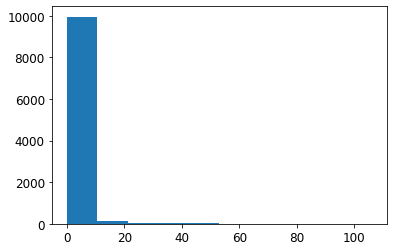

In [89]:
#checking the distriubtion of bumble bee count (target variable) for the "balanced" dataset
plt.hist(bee_temp2["bee_count"])

# Saving cleaned balanced and unbalanced datasets into the cleaned folder

In [71]:
clean_data3.to_csv("../data/cleaned/cleaned_unbalanced")
clean_smogn.to_csv("../data/cleaned/cleaned_balanced")